In [24]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader

from sklearn.preprocessing import MinMaxScaler
from scipy.signal import find_peaks
from tqdm import tqdm

from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU, BatchNormalization
import numpy as np

import matplotlib.pyplot as plt
import pickle
import gzip
import os

PEAK_THRESHOLD = 390
DATA_PATH = "./data/exported/1min/"

# Data Load

## Sitting

In [2]:
# Sitting data load
with gzip.open(DATA_PATH + "sitting_ecg.pkl", "rb") as f:
    sitting_ecg = pickle.load(f)

with gzip.open(DATA_PATH + "sitting_acc.pkl", "rb") as f:
    sitting_acc = pickle.load(f)
sitting_acc = sitting_acc - np.mean(sitting_acc)

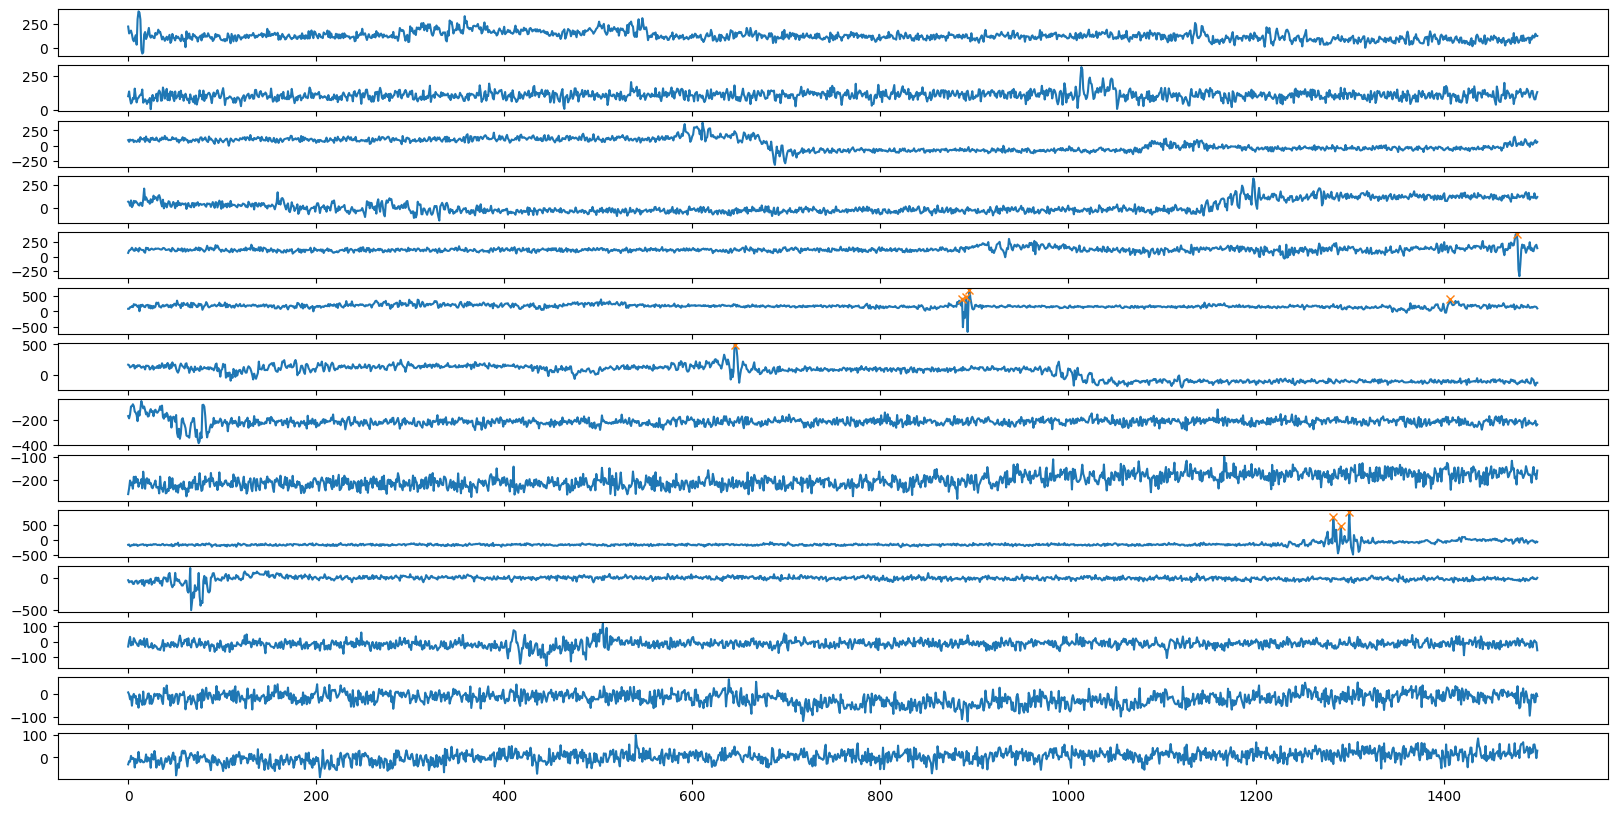

In [3]:
fig, ax = plt.subplots(len(sitting_acc), 1, figsize=(20, 10))
for idx in range(len(sitting_acc)):
    peaks, _ = find_peaks(sitting_acc[idx], height=PEAK_THRESHOLD)
    np.diff(peaks)

    ax[idx].plot(sitting_acc[idx])
    ax[idx].plot(peaks, sitting_acc[idx][peaks], "x")
plt.show()

In [4]:
peak_list = list()
for idx in range(len(sitting_acc)):
    peaks, _ = find_peaks(sitting_acc[idx], height=PEAK_THRESHOLD)
    if peaks == []:
        peak_list.append(np.array([0]))
    peak_list.append(len(peaks))

X_sitting = sitting_ecg
y_sitting = peak_list

/var/folders/gq/xnxpqv5x7jz19nnym4s4_l940000gn/T/ipykernel_42047/2995813941.py:4: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if peaks == []:
/var/folders/gq/xnxpqv5x7jz19nnym4s4_l940000gn/T/ipykernel_42047/2995813941.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if peaks == []:


## Walking

In [5]:
# Walking data load
with gzip.open(DATA_PATH + "walking_ecg.pkl", "rb") as f:
    walking_ecg = pickle.load(f)

with gzip.open(DATA_PATH + "walking_acc.pkl", "rb") as f:
    walking_acc = pickle.load(f)
walking_acc = walking_acc - np.mean(walking_acc)

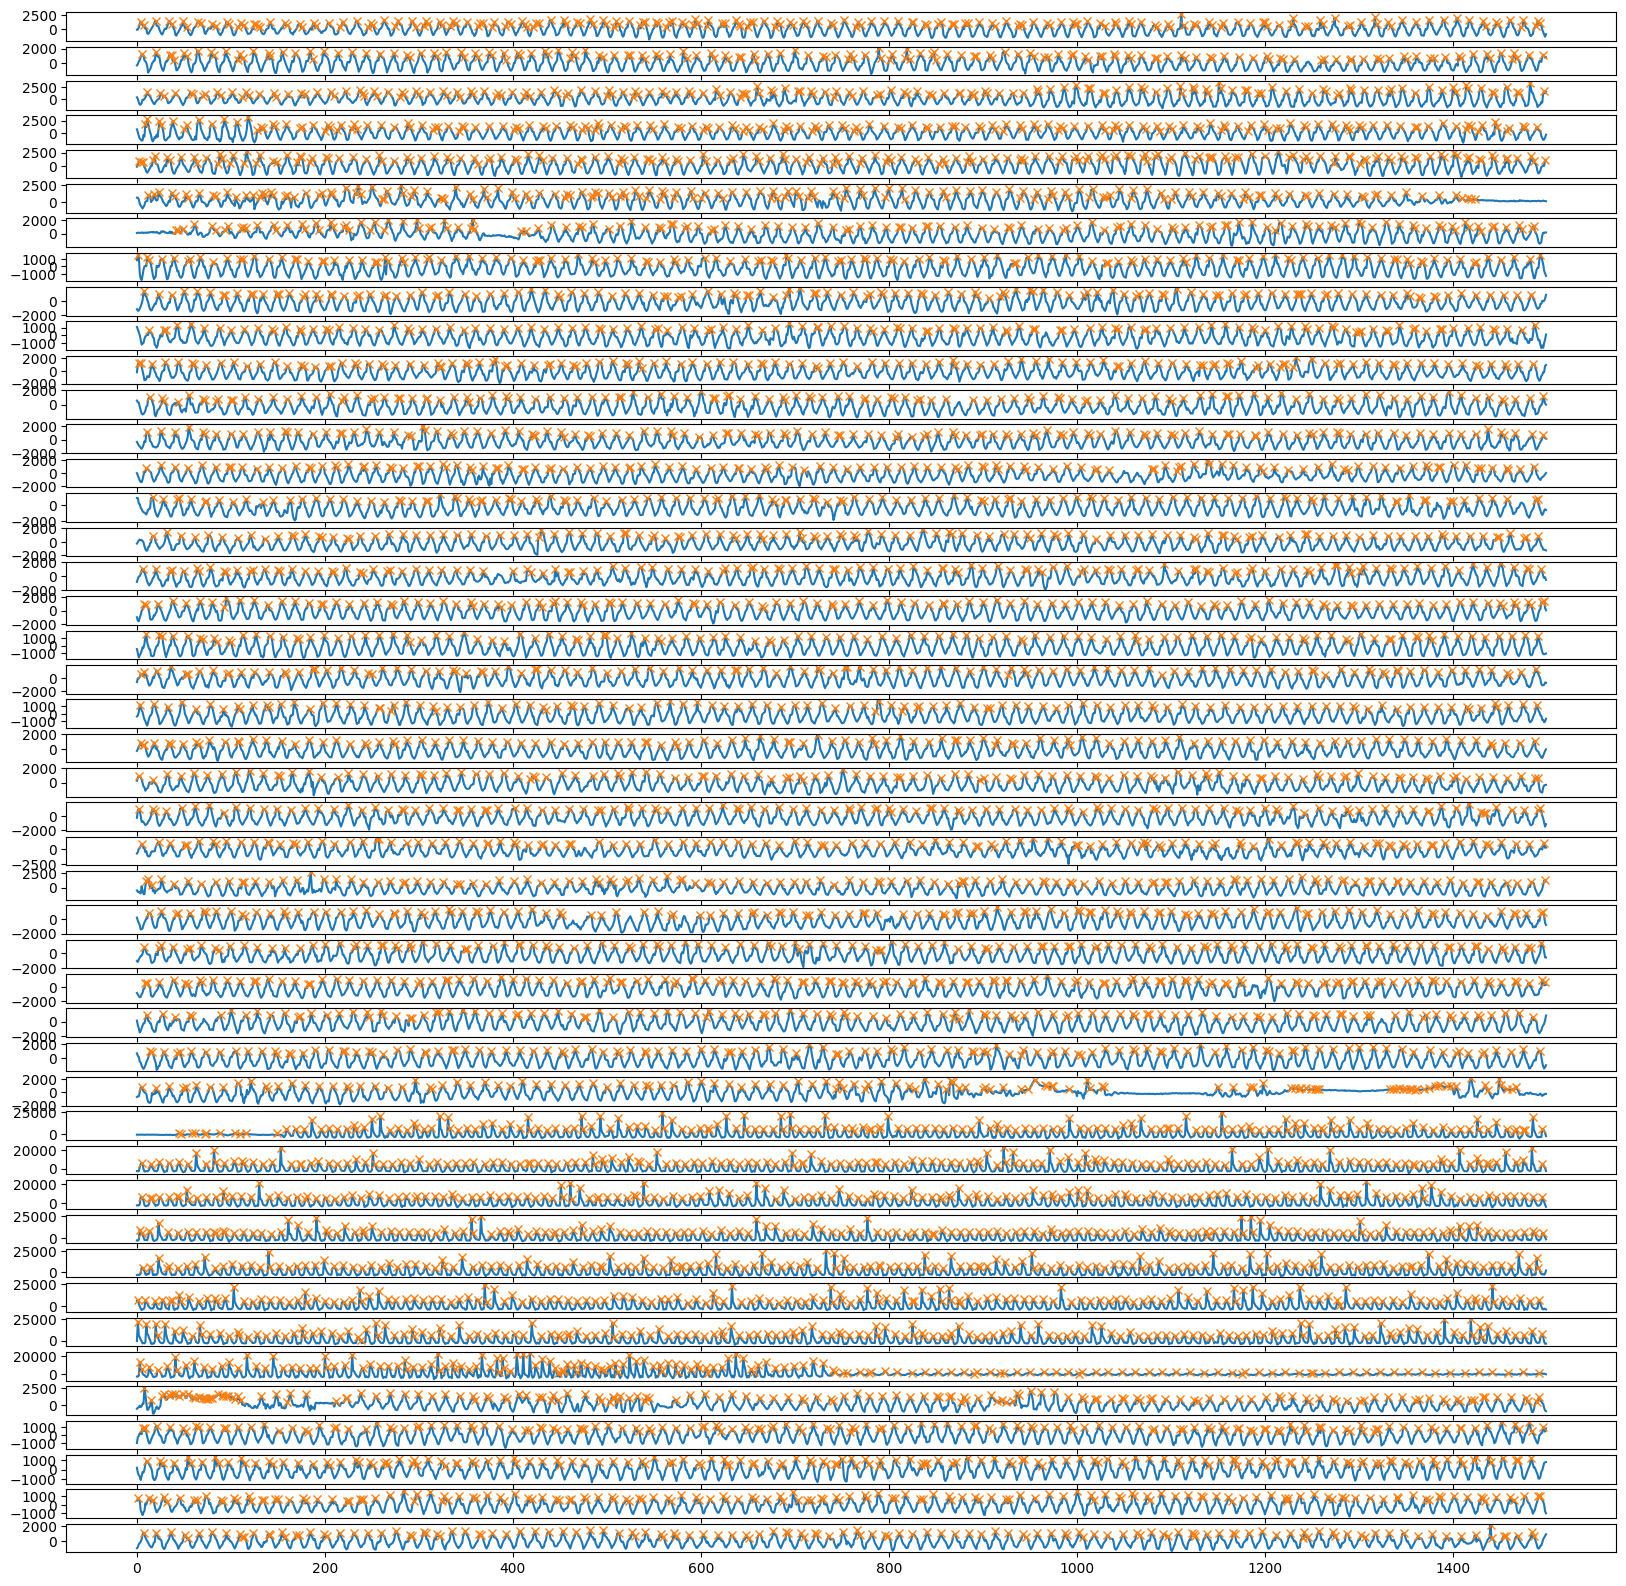

In [6]:
fig, ax = plt.subplots(len(walking_acc), 1, figsize=(20, 20))
for idx in range(len(walking_acc)):
    peaks, _ = find_peaks(walking_acc[idx], height=PEAK_THRESHOLD)
    np.diff(peaks)

    ax[idx].plot(walking_acc[idx])
    ax[idx].plot(peaks, walking_acc[idx][peaks], "x")
plt.show()

In [7]:
peak_list = list()
for idx in range(len(walking_acc)):
    peaks, _ = find_peaks(walking_acc[idx], height=PEAK_THRESHOLD)
    if peaks == []:
        peak_list.append(np.array([0]))
    peak_list.append(len(peaks))

X_walking = walking_ecg
y_walking = peak_list

/var/folders/gq/xnxpqv5x7jz19nnym4s4_l940000gn/T/ipykernel_42047/4260280322.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if peaks == []:


In [8]:
print(y_walking)

[196, 160, 170, 180, 189, 171, 143, 137, 138, 129, 133, 126, 132, 130, 123, 126, 132, 124, 119, 120, 116, 116, 122, 125, 125, 126, 129, 135, 144, 127, 128, 129, 179, 175, 176, 174, 176, 173, 180, 166, 162, 154, 156, 157, 135]


## Running

In [9]:
# Running data load
with gzip.open(DATA_PATH + "running_ecg.pkl", "rb") as f:
    running_ecg = pickle.load(f)

with gzip.open(DATA_PATH + "running_acc.pkl", "rb") as f:
    running_acc = pickle.load(f)
running_acc = running_acc - np.mean(running_acc)

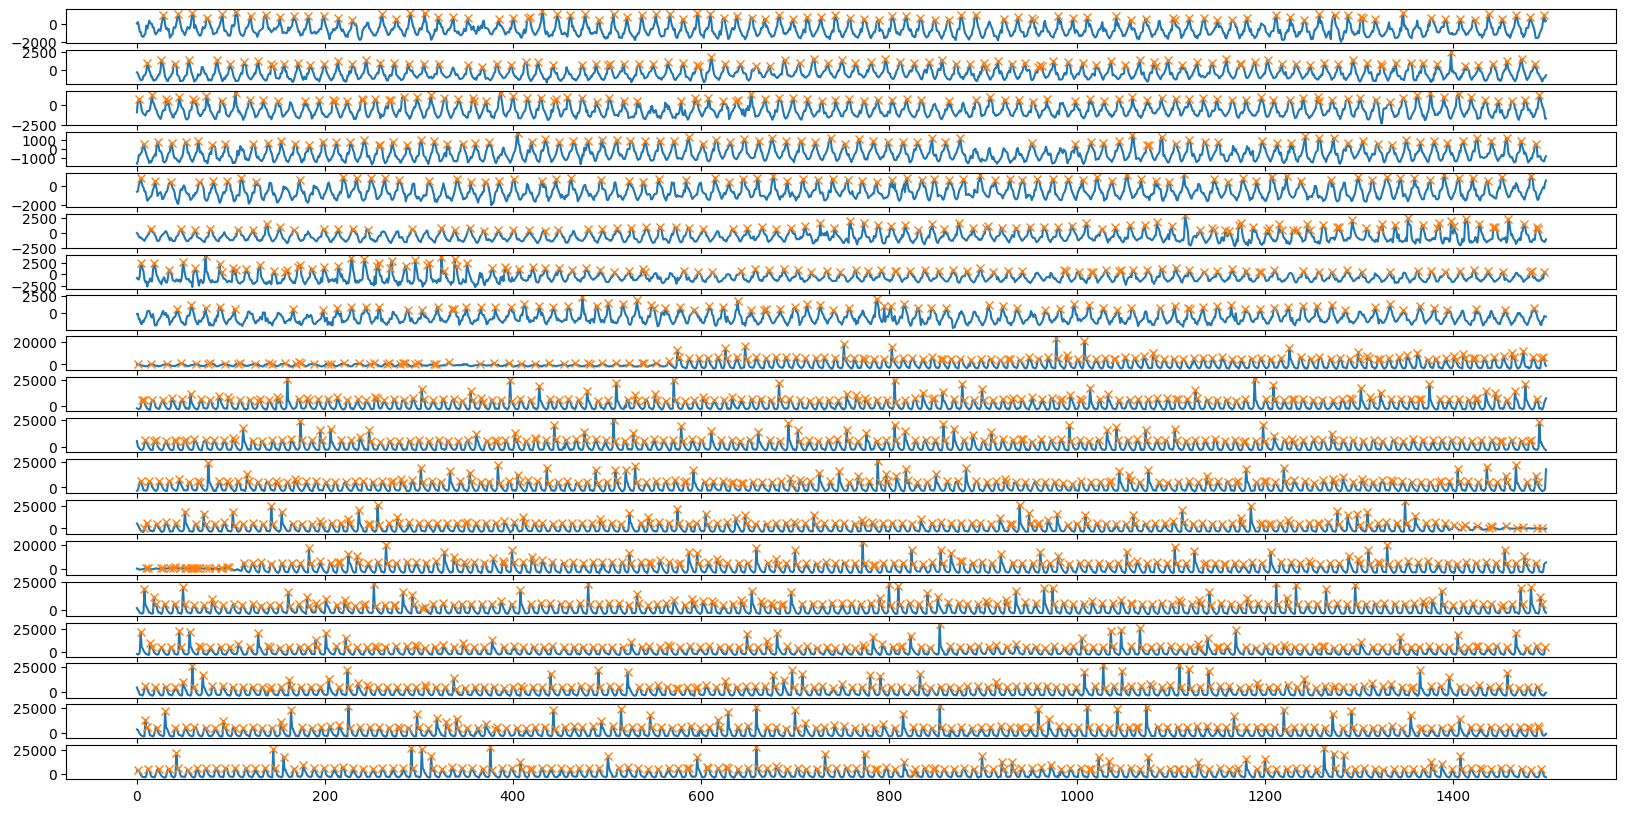

In [10]:
fig, ax = plt.subplots(len(running_acc), 1, figsize=(20, 10))
for idx in range(len(running_acc)):
    peaks, _ = find_peaks(running_acc[idx], height=PEAK_THRESHOLD)
    np.diff(peaks)

    ax[idx].plot(running_acc[idx])
    ax[idx].plot(peaks, running_acc[idx][peaks], "x")
plt.show()

In [11]:
peak_list = list()
for idx in range(len(running_acc)):
    peaks, _ = find_peaks(running_acc[idx], height=PEAK_THRESHOLD)
    if peaks == []:
        peak_list.append(np.array([0]))
    peak_list.append(len(peaks))

X_running = running_ecg
y_running = peak_list

/var/folders/gq/xnxpqv5x7jz19nnym4s4_l940000gn/T/ipykernel_42047/2482152495.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if peaks == []:


# X, y data Split

In [12]:
BATCH_SIZE = 1

In [13]:
X = np.concatenate((X_walking, X_running, X_sitting))
y = np.concatenate((y_walking, y_running, y_sitting))

scaler = MinMaxScaler()
X = scaler.fit_transform(X) ** 2

print(f"""X shape: {X.shape}
y shape: {y.shape}""")

X shape: (78, 15000)
y shape: (78,)


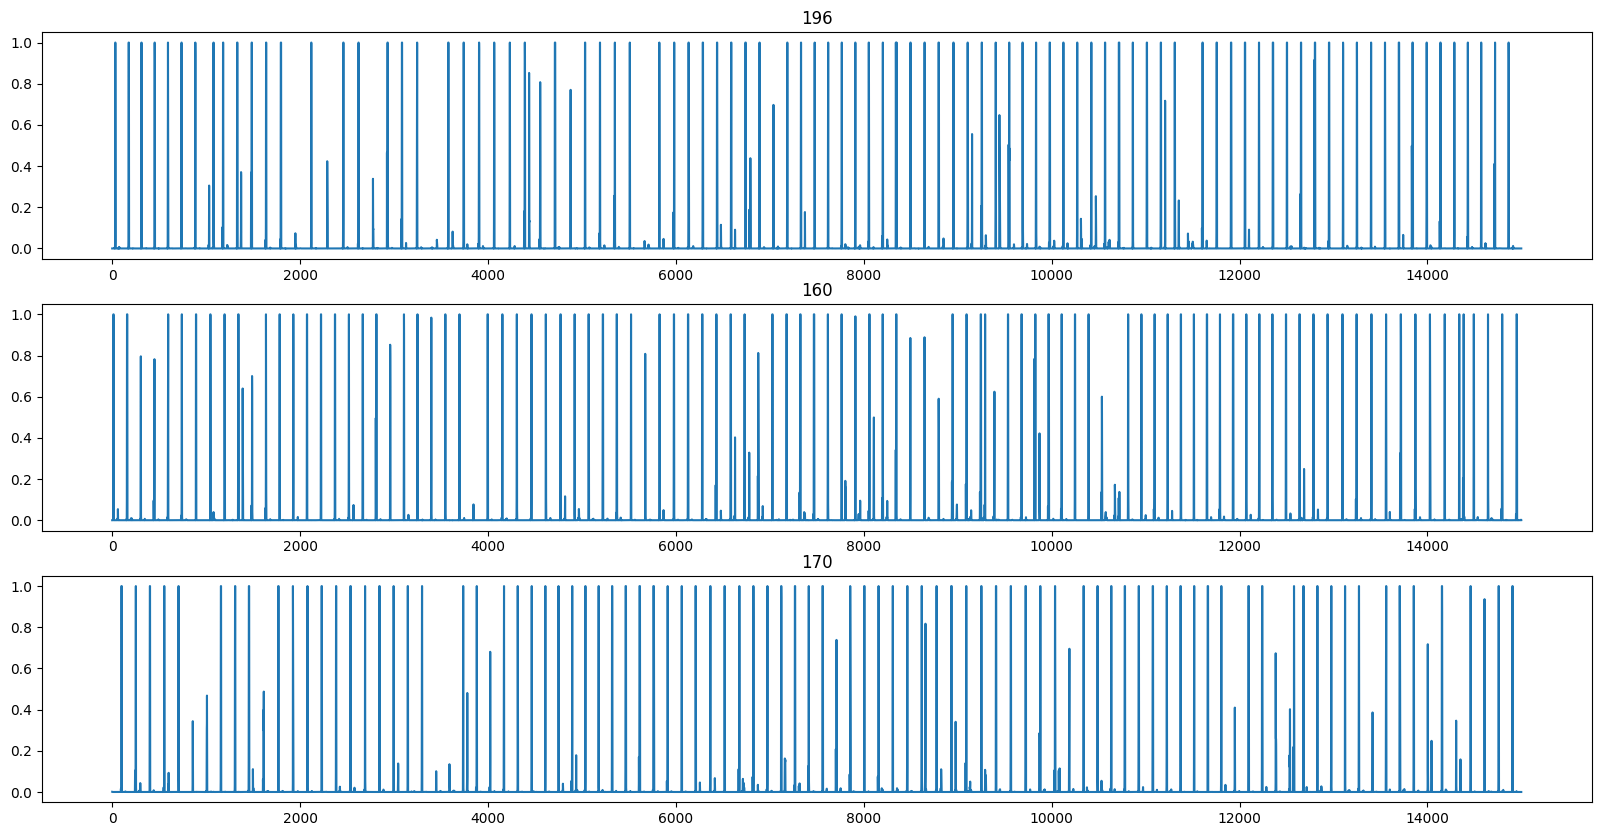

In [14]:
# Plotting the data
fig, ax = plt.subplots(3, 1, figsize=(20, 10))

ax[0].title.set_text(y[0])
ax[0].plot(X[0])

ax[1].title.set_text(y[1])
ax[1].plot(X[1])

ax[2].title.set_text(y[2])
ax[2].plot(X[2])
plt.show()

In [15]:
with gzip.open('./data//exported/X.pkl', 'wb') as f:
    pickle.dump(X, f)

with gzip.open('./data//exported/y.pkl', 'wb') as f:
    pickle.dump(y, f)

In [16]:
with gzip.open('./data//exported/X.pkl', 'rb') as f:
    X = pickle.load(f)

with gzip.open('./data//exported/y.pkl', 'rb') as f:
    y = pickle.load(f)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"""X_train shape: {X_train.shape}
y_train shape: {y_train.shape}
X_test shape: {X_test.shape}
y_test shape: {y_test.shape}""")

X_train shape: (62, 15000)
y_train shape: (62,)
X_test shape: (16, 15000)
y_test shape: (16,)


# Model

In [17]:
EPOCH = 100

In [18]:
input_layers = layers.Input(shape=(X_train.shape[1], 1,))

x = layers.Conv1D(32, 3, activation="relu")(input_layers)
x = layers.BatchNormalization()(x)

x = layers.Conv1D(64, 3, activation="relu")(x)
x = layers.Conv1D(64, 3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Conv1D(64, 1, activation="relu")(x)
x = layers.BatchNormalization()(x)

x = layers.Conv1D(128, 3, activation="relu")(x)
x = layers.Conv1D(128, 3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Conv1D(128, 1, activation="relu")(x)
x = layers.BatchNormalization()(x)

x = layers.Conv1D(256, 3, activation="relu")(x)
x = layers.Conv1D(256, 3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Conv1D(256, 1, activation="relu")(x)
x = layers.BatchNormalization()(x)

x = layers.GRU(256, return_sequences=True)(x)

x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
out = layers.Dense(1)(x)

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [26]:
model = Model(input_layers, out)

model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss=losses.MeanSquaredError(),
    metrics=['loss'],
)

In [27]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15000, 1)]        0         
                                                                 
 conv1d (Conv1D)             (None, 14998, 32)         128       
                                                                 
 batch_normalization (Batch  (None, 14998, 32)         128       
 Normalization)                                                  
                                                                 
 conv1d_1 (Conv1D)           (None, 14996, 64)         6208      
                                                                 
 conv1d_2 (Conv1D)           (None, 14994, 64)         12352     
                                                                 
 batch_normalization_1 (Bat  (None, 14994, 64)         256       
 chNormalization)                                          

# Model Train

In [28]:
history = model.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCH,
    validation_data=(X_test, y_test),
    verbose=1,
)

Epoch 1/100


TypeError: in user code:

    File "/Users/bahk_insung/miniconda3/lib/python3.10/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/Users/bahk_insung/miniconda3/lib/python3.10/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/bahk_insung/miniconda3/lib/python3.10/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/Users/bahk_insung/miniconda3/lib/python3.10/site-packages/keras/src/engine/training.py", line 1085, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/Users/bahk_insung/miniconda3/lib/python3.10/site-packages/keras/src/engine/training.py", line 1179, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/Users/bahk_insung/miniconda3/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 605, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/Users/bahk_insung/miniconda3/lib/python3.10/site-packages/keras/src/utils/metrics_utils.py", line 77, in decorated
        update_op = update_state_fn(*args, **kwargs)
    File "/Users/bahk_insung/miniconda3/lib/python3.10/site-packages/keras/src/metrics/base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "/Users/bahk_insung/miniconda3/lib/python3.10/site-packages/keras/src/metrics/base_metric.py", line 723, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)

    TypeError: 'str' object is not callable


In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label="Train loss")
plt.plot(val_loss, label="Val loss")
plt.legend()
plt.show()

In [ ]:
model.eval()
with torch.no_grad():
    for i, data in enumerate(test_dataloader):
        inputs, labels = data
        inputs = inputs.unsqueeze(1).to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        print(f"Loss: {loss.item():.5f}")

        output_x_range = np.linspace(0, len(outputs.cpu().numpy()), len(outputs.cpu().numpy()))
        labels_x_range = np.linspace(0, len(labels.cpu().numpy()), len(labels.cpu().numpy()))

        plt.figure(figsize=(10, 5))
        plt.plot(output_x_range, outputs.cpu().numpy() * 2, label="Predicted", color="red", marker="o")
        plt.plot(labels_x_range, labels.cpu().numpy(), label="True", color="blue", marker="*")
        plt.legend()
        plt.show()
        break
